In [1]:
import glob
import os
from pathlib import Path
import sys
from tqdm import tqdm
import cv2
import numpy as np

from src.utils import data_utils
from deep_spectral_method.detection_2D_utils import UnsupBbox
from bbox_3D_estimation.utils import sort_path_list, predict_3D_bboxes, read_list_poses
from bbox_3D_estimation.plotting import plot_est_and_gt_ellipses_on_images, plot_3D_scene
from bbox_3D_estimation.lfd import compute_estimates, dual_quadric_to_ellipsoid_parameters

/Users/PELLERITO/opt/anaconda3/envs/onepose-DSM_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data_root = os.getcwd() + "/data/onepose_datasets/tiger"
feature_dir = data_root + "/DSM_features"
segment_dir = data_root + "/tiger-annotate"
intriscs_path = segment_dir + "/intrinsics.txt"

BboxPredictor = UnsupBbox(feature_dir=feature_dir)
K, _ = data_utils.get_K(intriscs_path)

poses_list = glob.glob(os.path.join(os.getcwd(), f"{segment_dir}/poses", "*.txt"))
poses_list = sort_path_list(poses_list)
img_lists = glob.glob(os.path.join(os.getcwd(), f"{segment_dir}/color_full", "*.png"))
img_lists = sort_path_list(img_lists)

Using cache found in /Users/PELLERITO/.cache/torch/hub/facebookresearch_dino_main


In [ ]:
bbox3d = predict_3D_bboxes(
    BboxPredictor=BboxPredictor,
    img_lists=img_lists,
    poses_list=poses_list,
    K=K,
    data_root=data_root,
    step=1,
    save_2d_bboxes=True
)

In [ ]:
box2d_path = data_root + '/box2d_corners.txt'
bbox2d = np.loadtxt(box2d_path)

In [5]:
box3d_path = data_root + '/box3d_corners.txt'
bbox3d = np.loadtxt(box3d_path)

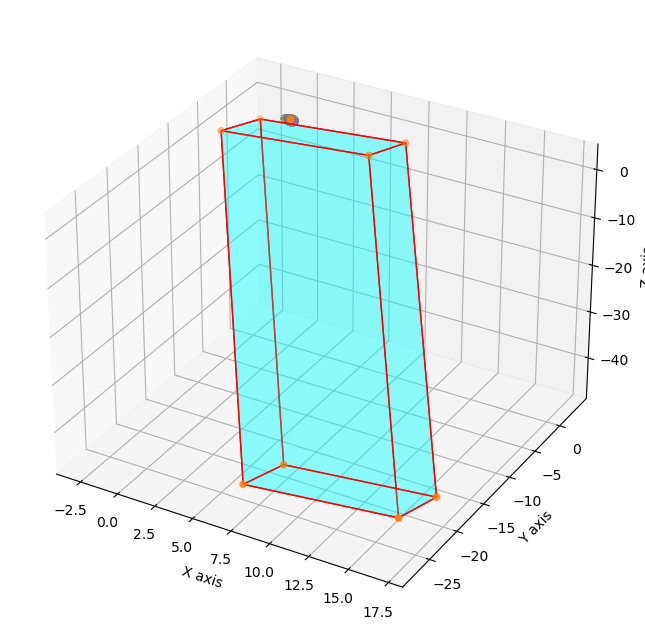

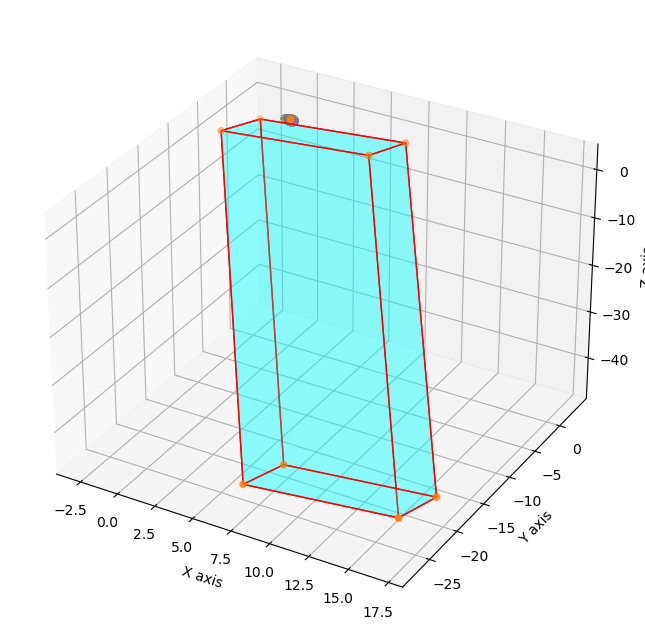

In [6]:
all_poses = read_list_poses(poses_list)
plot_3D_scene(
    Ms_t = all_poses, 
    points = bbox3d, 
    GT_points = None
)